In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings

from datetime import datetime

warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
train_data = pd.read_csv("yds_train2018.csv")
print(train_data.columns)

test_data = pd.read_csv("yds_test2018.csv")
print(test_data.columns)

#holidays = pd.read_excel("holidays.xlsx")
holidays = pd.read_csv("holidays_cleaned_mapping.csv", encoding='cp1252')
print(holidays.columns)

promotional_expense = pd.read_csv("promotional_expense.csv")
print(promotional_expense.columns)

Index(['S_No', 'Year', 'Month', 'Week', 'Merchant_ID', 'Product_ID', 'Country',
       'Sales'],
      dtype='object')
Index(['S_No', 'Year', 'Month', 'Product_ID', 'Country', 'Sales'], dtype='object')
Index(['Date', 'Country', 'Holiday', 'holiday_cleaned_final'], dtype='object')
Index(['Year', 'Month', 'Country', 'Product_Type', 'Expense_Price'], dtype='object')


In [ ]:
train_data.groupby(['Product_ID', 'Merchant_ID', 'Year', 'Month', 'Week']).count()

In [ ]:
train_data.dtypes

In [ ]:
len(train_data)

In [3]:
train_data[(train_data.Sales< -2000000) | (train_data.Sales > 3e7)].index

Int64Index([50593, 51736, 60879], dtype='int64')

In [4]:
train_data = train_data.drop(train_data[(train_data.Sales< -2000000) | (train_data.Sales > 3e7)].index)

In [ ]:

min_sales

In [ ]:
train_data.plot( y="Sales", marker='.', linestyle='none')

In [ ]:
min_sales = train_data['Sales'].min()
arr, _ = stats.boxcox(train_data['Sales'] + abs(min_sales) + 0.0001)
train_data['Sales'] = pd.Series(arr)
train_data = train_data.dropna(subset=['Sales'])

In [ ]:
len(pd.Series(arr))

In [ ]:
train_data['Sales'] = pd.Series(arr)

In [ ]:
train_data = train_data.dropna(subset=['Sales'])

In [5]:
new_test_data = pd.DataFrame()
Merchant_id_df = dict()

def str_key(country, year, month, product):
    return country + str(year) + str(month) + str(product)

for index, item in test_data.iterrows():
    country = item.Country
    lastmonth = item.Month
    lastyear = item.Year
    product = item.Product_ID
    if item.Month == 1:
        lastyear = item.Year - 1
        lastmonth = 12
    else:
        lastmonth = item.Month - 1

    #Merchant_Ids = Merchant_id_df[(Merchant_id_df.Year == year) & (Merchant_id_df.Month == month) & (Merchant_id_df.Country == country) & (Merchant_id_df.Product_ID == product)]['Merchant_ID']
    Merchant_Ids = []
    if str_key(country, lastyear, lastmonth, product) not in Merchant_id_df.keys():
        Merchant_Ids = train_data[(train_data.Product_ID == product ) & (train_data.Country == country) & (train_data.Month == lastmonth) & (train_data.Year == lastyear)]["Merchant_ID"].unique()
        Merchant_id_df[str_key(country, item.Year, item.Month, product)] = Merchant_Ids
    else:
        Merchant_Ids = Merchant_id_df[str_key(country, lastyear, lastmonth, product)]
        Merchant_id_df[str_key(country, item.Year, item.Month, product)] = Merchant_Ids
    
    #print(Merchant_Ids)
    temp_df = pd.DataFrame([item]* len(Merchant_Ids))
    temp_df["Merchant_ID"] = Merchant_Ids
    new_test_data = new_test_data.append(temp_df, ignore_index=True)

new_test_data["Month"] = new_test_data.Month.astype("int8")
new_test_data["Year"] = new_test_data.Year.astype("int16")
new_test_data["S_No"] = new_test_data.S_No.astype("int32")
new_test_data["Product_ID"] = new_test_data.Product_ID.astype("int32")

new_test_data.to_csv("new_test_data.csv")
new_test_data.head()

,S_No,Year,Month,Product_ID,Country,Sales,Merchant_ID
0,79073,2016,4,1,Argentina,NaN,ar00002
1,79073,2016,4,1,Argentina,NaN,ar00004
2,79073,2016,4,1,Argentina,NaN,ar000012
3,79073,2016,4,1,Argentina,NaN,ar000014
4,79073,2016,4,1,Argentina,NaN,ar000015


In [6]:
promotional_expense = promotional_expense.rename(columns={"Product_Type": "Product_ID"})

In [7]:
train_data = train_data.groupby(['Year', 'Month', 'Merchant_ID', 'Product_ID', 'Country'])['Sales'].sum().reset_index(level=[0,1,2,3,4])

In [8]:
train_data = train_data.merge(promotional_expense, how="left")
new_test_data = new_test_data.merge(promotional_expense, how="left")

In [9]:
holidays['holiday_cleaned_final'].unique()

array(['new years day', 'maundy thursday', 'good friday', 'easter day',
       'big bedday', 'ascension day', 'whit monday', 'christmas',
       'boxing day', 'pass', 'pentecost', 'labour day',
       'national holiday', 'all saints day', 'truce', 'carnivals day',
       'memorys national day for the truth and justice',
       'veterans dayand the fallen in the malvinas war', 'may day',
       'day pass to the immortality of general', 'independence day',
       'respect for cultural diversity day', 'national sovereignty day',
       'immaculate conception', 'battle of boyacá', 'epiphany',
       'saint josephs day', 'sacred heart', 'assumption of mary',
       'discovery of america', 'body of christ',
       'saint peter and saint paul', 'bank holiday',
       'diamond jubilee of elizabeth ii',
       'wedding of william and catherine', 'first of may',
       'midsummer day'], dtype=object)

In [10]:
# imp_features = ['new years day', 'bank holiday', 'christmas', 'easter day', 'good friday', 'labour day', 'independence day', 'ascension day']
imp_features = ['new years day', 'maundy thursday', 'good friday', 'easter day',
       'big bedday', 'ascension day', 'whit monday', 'christmas',
       'boxing day', 'pass', 'pentecost', 'labour day',
       'national holiday', 'all saints day', 'truce', 'carnivals day',
       'memorys national day for the truth and justice',
       'veterans dayand the fallen in the malvinas war', 'may day',
       'day pass to the immortality of general', 'independence day',
       'respect for cultural diversity day', 'national sovereignty day',
       'immaculate conception', 'battle of boyacá', 'epiphany',
       'saint josephs day', 'sacred heart', 'assumption of mary',
       'discovery of america', 'body of christ',
       'saint peter and saint paul', 'bank holiday',
       'diamond jubilee of elizabeth ii',
       'wedding of william and catherine', 'first of may',
       'midsummer day']
holidays_dummies = pd.get_dummies(holidays['holiday_cleaned_final'])[imp_features]

In [11]:
holidays = holidays.join(holidays_dummies)

In [12]:
def parse_date(item):
    return datetime.strptime(item, '%Y, %m, %d')

holidays['parsedDate'] = holidays['Date'].apply(parse_date)

In [13]:
holidays['Year'] = pd.DatetimeIndex(holidays['parsedDate']).year
holidays['Month'] = pd.DatetimeIndex(holidays['parsedDate']).month

In [14]:
counted_holidays = pd.DataFrame(holidays.groupby(['Country', 'Year', 'Month'])[imp_features + ["Date"]].count())
counted_holidays = counted_holidays.rename(columns={'Date': 'Holidays'})
counted_holidays = counted_holidays.reset_index(level=[0, 1, 2])

In [15]:
train_data = train_data.merge(counted_holidays, how="left")
new_test_data = new_test_data.merge(counted_holidays, how="left")

In [16]:
train_data['Holidays'] = train_data['Holidays'].fillna(0)
new_test_data['Holidays'] = new_test_data['Holidays'].fillna(0)

train_data[imp_features] = train_data[imp_features].fillna(0)
new_test_data[imp_features] = new_test_data[imp_features].fillna(0)

In [17]:
from sklearn.preprocessing import LabelEncoder

country_encoder = LabelEncoder()
country_encoder.fit(train_data['Country'])
train_data['Country_cid'] = pd.Series(country_encoder.transform(train_data['Country']))
new_test_data['Country_cid'] = pd.Series(country_encoder.transform(new_test_data['Country']))
train_data = train_data.join(pd.get_dummies(train_data['Country_cid'], prefix="COUNTRY"))
new_test_data = new_test_data.join(pd.get_dummies(new_test_data['Country_cid'], prefix="COUNTRY"))

country_features = ['COUNTRY_0', 'COUNTRY_1', 'COUNTRY_2', 'COUNTRY_3', 'COUNTRY_4',
       'COUNTRY_5'];

In [18]:
merchant_encoder = LabelEncoder()
merchant_encoder.fit(train_data['Merchant_ID'])
train_data['Merchant_ID_cid'] = pd.Series(merchant_encoder.transform(train_data['Merchant_ID']))
new_test_data['Merchant_ID_cid'] = pd.Series(merchant_encoder.transform(new_test_data['Merchant_ID']))

In [19]:
product_features = ['PRODUCT_1', 'PRODUCT_2', 'PRODUCT_3', 'PRODUCT_4', 'PRODUCT_5'];
country_features = ['COUNTRY_0', 'COUNTRY_1', 'COUNTRY_2', 'COUNTRY_3', 'COUNTRY_4',
       'COUNTRY_5'];

In [20]:
train_data = train_data.join(pd.get_dummies(train_data['Product_ID'], prefix="PRODUCT"))
new_test_data = new_test_data.join(pd.get_dummies(new_test_data['Product_ID'], prefix="PRODUCT"))

product_features = ['PRODUCT_1', 'PRODUCT_2', 'PRODUCT_3', 'PRODUCT_4', 'PRODUCT_5'];

In [ ]:
train_data.isnull().sum()

In [ ]:
new_test_data.isnull().sum()

In [ ]:
promotional_expense[(promotional_expense.Country == "Columbia") & (promotional_expense.Product_ID == 1)].reset_index().plot(y="Expense_Price")

In [21]:
promotional_expense[(promotional_expense.Country == "Argentina")]["Expense_Price"].median()

5347.1449999999995

In [22]:
promotional_expense[(promotional_expense.Country == "Columbia")]["Expense_Price"].median()

2022.8995

In [ ]:
train_data[(train_data.Country == "Argentina") & (train_data.Product_ID == 2)].reset_index().plot(x="Expense_Price", y="Sales", marker='o', linestyle='none')

In [23]:
train_data[(train_data.Product_ID == 3) & (train_data.Country == "Argentina")] = train_data[(train_data.Product_ID == 3) & (train_data.Country == "Argentina")].fillna(5347.145)
new_test_data[(new_test_data.Product_ID == 3) & (new_test_data.Country == "Argentina")] = new_test_data[(new_test_data.Product_ID == 3) & (new_test_data.Country == "Argentina")].fillna(5347.145)

In [24]:
train_data[(train_data.Product_ID == 3) & (train_data.Country == "Columbia")] = train_data[(train_data.Product_ID == 3) & (train_data.Country == "Columbia")].fillna(2022.8995)
new_test_data[(new_test_data.Product_ID == 3) & (new_test_data.Country == "Columbia")] = new_test_data[(new_test_data.Product_ID == 3) & (new_test_data.Country == "Columbia")].fillna(2022.8995)

In [ ]:
# ex_argentina = 0.036
# ex_belgium = 1.17
# ex_columbia = 0.00035
# ex_denmark = 0.16
# ex_england = 1.30
# ex_finland = 1.17

In [ ]:
# def normalize_currency(item):
#     if item.Country == "Argentina":
#         return item.Sales * ex_argentina
#     elif item.Country == "Belgium":
#         return item.Sales * ex_belgium
#     elif item.Country == "Columbia":
#         return item.Sales * ex_columbia
#     elif item.Country == "Denmark":
#         return item.Sales * ex_denmark
#     elif item.Country == "England":
#         return item.Sales * ex_england
#     elif item.Country == "Finland":
#         return item.Sales * ex_finland

In [25]:
sales_bk = train_data['Sales'].copy()

In [ ]:
train_data['Sales'] = sales_bk

In [ ]:
from scipy.special import boxcox1p
min_sales = train_data['Sales'].min()
#arr, _ = stats.boxcox(train_data['Sales'] + abs(min_sales) + 1)
arr = np.log1p(train_data['Sales'] + abs(min_sales))
train_data['Sales'] = pd.Series(arr)
train_data = train_data.dropna(subset=['Sales'])

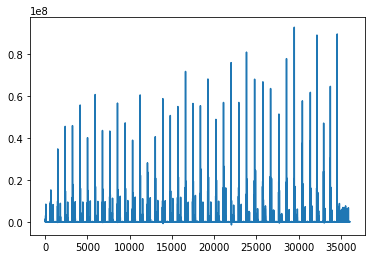

In [26]:
train_data['Sales'].plot()

In [ ]:
train_data = train_data.drop([27728])

In [ ]:
train_data.columns

In [ ]:
train_data.dtypes

In [46]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train_data[['Year', 'Month', 'Merchant_ID_cid', 'Expense_Price', 'Holidays'] + imp_features + country_features + product_features], train_data['Sales'], test_size=0.0, random_state=42)

In [30]:
def smape_rf(preds,y):
    # y = y.get_label()
    score = 100*(np.sum(2*np.absolute(preds-y)/(np.absolute(preds)+np.absolute(y))))/len(y)
    return 'smape', score

In [47]:
regr = RandomForestRegressor(n_estimators=10, max_depth=None, random_state=1, n_jobs=6, criterion="mae")
regr.fit(X_train, y_train)
#regr.score(X_test, y_test)

RandomForestRegressor(bootstrap=True, criterion='mae', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=6,
           oob_score=False, random_state=1, verbose=0, warm_start=False)

In [35]:
smape_rf(regr.predict(X_test), y_test)

('smape', 57.96432561374112)

In [36]:
regr.feature_importances_

array([6.71068588e-02, 7.05646156e-02, 6.56137667e-01, 1.19908870e-01,
       1.50385759e-03, 7.11990600e-04, 1.39129643e-03, 1.22295906e-03,
       1.56099038e-03, 1.99449824e-03, 1.61388674e-03, 9.88746922e-04,
       1.56735064e-03, 1.27891416e-03, 1.98199154e-03, 2.03802115e-03,
       1.64182278e-03, 1.64355010e-03, 1.39324967e-03, 1.52112538e-03,
       1.25212839e-03, 2.50567958e-03, 1.35151099e-03, 2.34812457e-03,
       1.32282298e-03, 1.34460428e-03, 1.24578628e-03, 1.41222292e-03,
       1.29632581e-03, 1.34675703e-03, 1.93605447e-03, 1.44666492e-03,
       1.09153181e-03, 1.48973457e-03, 1.38750018e-03, 1.16868807e-03,
       1.19302204e-03, 1.42767717e-03, 1.86363354e-03, 1.13871729e-03,
       9.81669568e-04, 1.34635999e-03, 1.38175418e-05, 7.28852595e-07,
       1.42607252e-05, 0.00000000e+00, 1.22555949e-05, 1.33451432e-05,
       7.44835537e-03, 1.34660751e-02, 8.85608856e-03, 2.30979880e-04,
       2.74613445e-04])

In [ ]:
X_test_cached = X_test.copy()
y_test_cached = y_test.copy()

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

regr = GradientBoostingRegressor(max_depth=3, random_state=1)
regr.fit(X_train, y_train)
regr.score(X_test, y_test)

In [48]:
submission_data = new_test_data.copy()
submission_data['Sales'] = regr.predict(new_test_data[['Year', 'Month', 'Merchant_ID_cid', 'Expense_Price', 'Holidays'] + imp_features + country_features + product_features])
# submission_data['Sales'] = np.expm1(submission_data['Sales']) - min_sales

In [49]:
submission_data = submission_data.drop(columns=["Expense_Price", "Country_cid", "Merchant_ID", "Merchant_ID_cid", "Holidays"] + imp_features  + country_features + product_features)

In [50]:
submission_data.head()

,S_No,Year,Month,Product_ID,Country,Sales
0,79073,2016,4,1,Argentina,2741917.50
1,79073,2016,4,1,Argentina,29610.00
2,79073,2016,4,1,Argentina,199710.00
3,79073,2016,4,1,Argentina,48825.00
4,79073,2016,4,1,Argentina,35549.43


In [51]:
submission_data = submission_data.groupby(['S_No', 'Year', 'Month', 'Product_ID', 'Country']).sum().reset_index(level=4)

In [52]:
submission_data.to_csv("submission13_smape.csv")

In [ ]:
test123 = pd.read_csv("submission.csv")

In [ ]:
from xgboost import XGBRegressor
regr = XGBRegressor(max_depth=3, n_jobs=4, random_state=52)
regr.fit(X_train, y_train)
regr.score(X_test, y_test)

In [45]:
def smape(preds,y):
    y = y.get_label()
    score = 100*(np.sum(2*np.absolute(preds-y)/(np.absolute(preds)+np.absolute(y))))/len(y)
    return 'smape', score

import xgboost as xgb_raw
import scipy

xgb = xgb_raw.XGBModel(n_estimators= 10000,eta = 0.01, max_depth = 5, subsample = 0.5, colsample_bytree = 0.2,reg_alpha=0.1, reg_lambda=0.8,n_jobs = 7, objective = 'reg:linear')
eval_set  = [(X_train,y_train), (X_test,y_test)]
xgb.fit(X_train,y_train,verbose = True, eval_set = eval_set,eval_metric = smape,early_stopping_rounds=10)

[0]	validation_0-rmse:2.15521e+06	validation_1-rmse:2.41764e+06	validation_0-smape:136.423	validation_1-smape:136.745
Multiple eval metrics have been passed: 'validation_1-smape' will be used for early stopping.

Will train until validation_1-smape hasn't improved in 10 rounds.
[1]	validation_0-rmse:2.15246e+06	validation_1-rmse:2.41553e+06	validation_0-smape:124.275	validation_1-smape:125.131
[2]	validation_0-rmse:2.14946e+06	validation_1-rmse:2.41345e+06	validation_0-smape:129.605	validation_1-smape:130.464
[3]	validation_0-rmse:2.14491e+06	validation_1-rmse:2.40994e+06	validation_0-smape:128.403	validation_1-smape:129.247
[4]	validation_0-rmse:1.97868e+06	validation_1-rmse:2.21996e+06	validation_0-smape:127.12	validation_1-smape:127.888
[5]	validation_0-rmse:1.97621e+06	validation_1-rmse:2.21791e+06	validation_0-smape:127.771	validation_1-smape:128.541
[6]	validation_0-rmse:1.97551e+06	validation_1-rmse:2.21727e+06	validation_0-smape:131.372	validation_1-smape:132.241
[7]	validation

XGBModel(base_score=0.5, booster='gbtree', colsample_bylevel=1,
     colsample_bytree=0.2, eta=0.01, gamma=0, learning_rate=0.1,
     max_delta_step=0, max_depth=5, min_child_weight=1, missing=None,
     n_estimators=10000, n_jobs=7, nthread=None, objective='reg:linear',
     random_state=0, reg_alpha=0.1, reg_lambda=0.8, scale_pos_weight=1,
     seed=None, silent=True, subsample=0.5)

In [ ]:
import xgboost as xgb
xgb = xgb.XGBModel(n_estimators= 10000,eta = 0.01, max_depth = 7, subsample = 0.5, colsample_bytree = 0.2,reg_alpha=0.1, reg_lambda=0.2,n_jobs = 7)
eval_set  = [(X_train,y_train), (X_test_cached,y_test_cached)]
xgb.fit(X_train,y_train,verbose = True, eval_set = eval_set,eval_metric = 'error',early_stopping_rounds=10)

In [ ]:
submission_data = new_test_data.copy()
submission_data['Sales'] = xgb.predict(new_test_data[['Year', 'Month', 'Merchant_ID_cid', 'Product_ID', 'Country_cid', 'Expense_Price', 'Holidays']])

submission_data = submission_data.drop(columns=["Expense_Price", "Country_cid", "Merchant_ID", "Merchant_ID_cid", "Holidays"])
submission_data = submission_data.groupby(['S_No', 'Year', 'Month', 'Product_ID', 'Country']).sum().reset_index(level=4)

In [ ]:
submission_data.to_csv("submission4.csv")